##Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



In [1]:
# General DS Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Decision Tree and Model Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [2]:
# Acquire Step
df = acquire.get_titanic_data()


In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
train, validate, test = prepare.prep_titanic_data(df)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [5]:
# Preprocessing for modeling
X_train_titanic = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train_titanic = train.survived

X_validate_titanic = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate_titanic = validate.survived

X_test_titanic = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test_titanic = test.survived


In [6]:
X_train_titanic.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [7]:
y_train_titanic[:5]


583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [8]:
X_train_titanic.shape, X_validate_titanic.shape, X_test_titanic.shape

((498, 9), (214, 9), (179, 9))

In [9]:
y_train_titanic.shape, y_validate_titanic.shape, y_test_titanic.shape

((498,), (214,), (179,))

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [10]:
y_train_titanic[0:10]


583    0
165    1
50     0
259    1
306    1
308    0
314    0
883    0
459    0
180    0
Name: survived, dtype: int64

In [11]:
y_train_titanic.value_counts()


0    307
1    191
Name: survived, dtype: int64

In [12]:
# The mode is a great baseline
baseline_titanic = y_train_titanic.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train_titanic == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [13]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1.fit(X_train_titanic, y_train_titanic)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions_titanic = tree1.predict(X_train_titanic)

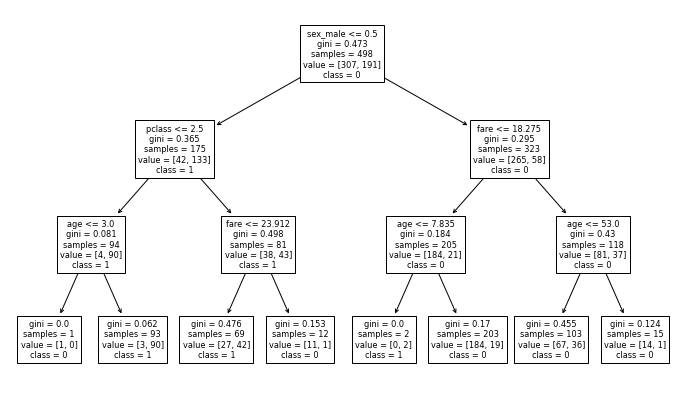

In [14]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train_titanic.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [15]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train_titanic, y_train_titanic)))

Accuracy of Decision Tree classifier on training set: 0.83


In [16]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train_titanic, y_train_titanic)))

Accuracy of Decision Tree classifier on training set: 0.83


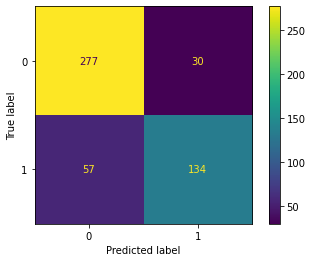

In [17]:
plot_confusion_matrix(tree1, X_train_titanic, y_train_titanic)


In [18]:
print(classification_report(y_train_titanic, y_predictions_titanic))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [19]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train_titanic, y_predictions_titanic, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [20]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_predictions_titanic).ravel()


The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?

In [21]:
TN, FP, FN, TP


(277, 30, 57, 134)

In [22]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train_titanic.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


Sklearn is calling survival (1) our positive case



In [23]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")


Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


### 5. Run through steps 2-4 using a different max_depth value.



In [24]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_titanic, y_train_titanic)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train_titanic)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train_titanic, y_predictions_titanic, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

### 6. Which model performs better on your in-sample data?



In [25]:
# Max depth of 15+ produces the highest accuracy


### 7. Which model performs best on your out-of-sample data, the validate set?



In [26]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_titanic, y_train_titanic)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_titanic, y_train_titanic)
    
    out_of_sample_accuracy = tree.score(X_validate_titanic, y_validate_titanic)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
titanic = pd.DataFrame(metrics)
titanic["difference"] = titanic.train_accuracy - titanic.validate_accuracy
titanic


,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.799065,0.054348
5,6,0.865462,0.789720,0.075742
6,7,0.885542,0.780374,0.105168
7,8,0.897590,0.799065,0.098525
8,9,0.921687,0.794393,0.127294
9,10,0.933735,0.794393,0.139342


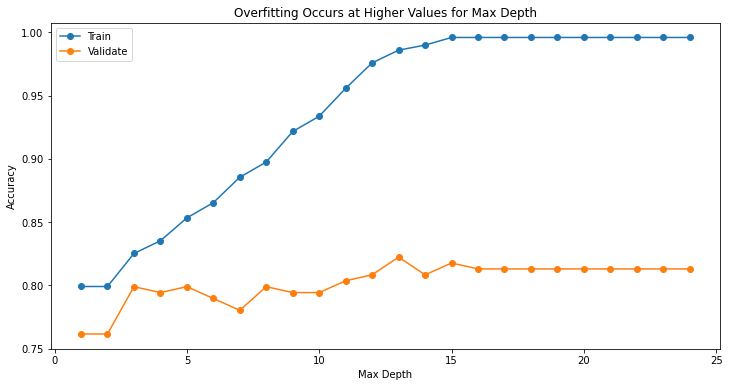

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(titanic.max_depth, titanic.train_accuracy, marker = 'o', label = 'Train')
plt.plot(titanic.max_depth, titanic.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
titanic[titanic.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.825301,0.799065,0.026236
4,5,0.853414,0.799065,0.054348
7,8,0.897590,0.799065,0.098525
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.789720,0.075742
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515


### 8. Work through these same exercises using the Telco dataset.


In [29]:
# Acquire Step
telco = acquire.get_telco_data()

In [30]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [31]:
telco.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [32]:
train, validate, test = prepare.prep_telco_data(telco)
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


In [33]:
# Preprocessing for modeling

#functions can't take strings so i dropped all columns that are strings
drop_columns = list(train.select_dtypes(include='object').columns) + ['churn_encoded']

X_train_telco = train.drop(columns=drop_columns)
y_train_telco = train.churn_encoded

X_validate_telco = validate.drop(columns=drop_columns)
y_validate_telco = validate.churn_encoded

X_test_telco = test.drop(columns=drop_columns)
y_test_telco = test.churn_encoded


In [34]:
y_train_telco

5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    1
3444    0
1002    0
4192    0
Name: churn_encoded, Length: 3937, dtype: int64

In [35]:
X_train_telco.columns.tolist()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [36]:
X_train_telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,multiple_lines_No phone service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.20,0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.90,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
X_train_telco.shape, X_validate_telco.shape, X_test_telco.shape

((3937, 30), (1688, 30), (1407, 30))

In [38]:
y_train_telco.shape, y_validate_telco.shape, y_test_telco.shape


((3937,), (1688,), (1407,))

In [39]:
y_train_telco[0:10]

5919    0
1915    0
5054    0
2355    0
6279    0
6992    1
3614    0
4352    0
6845    1
3782    0
Name: churn_encoded, dtype: int64

In [40]:
y_train_telco.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [41]:
# The mode is a great baseline
baseline = y_train_telco.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train_telco == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [42]:
# Make the model
tree2 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree2.fit(X_train_telco, y_train_telco)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions_telco = tree2.predict(X_train_telco)

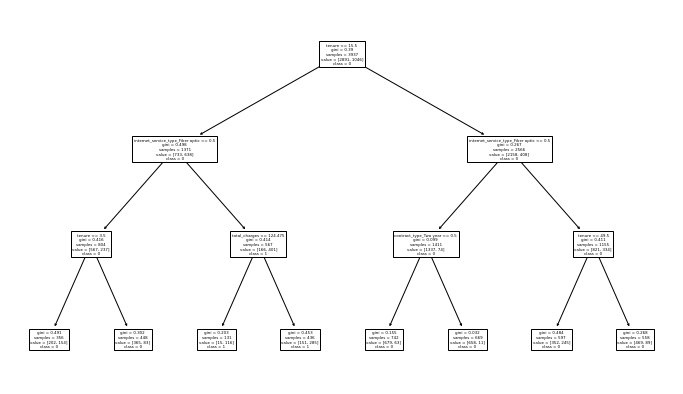

In [43]:
plt.figure(figsize=(12, 7))
plot_tree(tree2, feature_names=X_train_telco.columns, class_names=['0','1'])
plt.show()

In [44]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree2.score(X_train_telco, y_train_telco)))

Accuracy of Decision Tree classifier on training set: 0.79


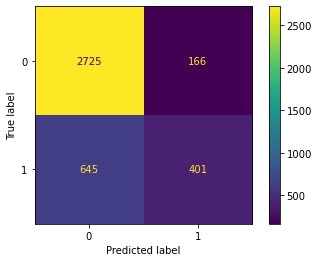

In [45]:
plot_confusion_matrix(tree2, X_train_telco, y_train_telco)

In [46]:
print(classification_report(y_train_telco, y_predictions_telco))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [47]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train_telco, y_predictions_telco, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)


Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.808605,0.707231,0.794006,0.757918,0.781672
recall,0.942580,0.383365,0.794006,0.662973,0.794006
f1-score,0.870468,0.497210,0.794006,0.683839,0.771299
support,2891.000000,1046.000000,0.794006,3937.000000,3937.000000


### Question 4: Just for Fun - Calculate Metrics
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [48]:
TN, FP, FN, TP = confusion_matrix(y_train_telco, y_predictions_telco).ravel()


The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?



In [49]:
TN, FP, FN, TP



(2725, 166, 645, 401)

In [50]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train_telco.value_counts())

Negative Cases: 2891
Positive Cases: 1046
0    2891
1    1046
Name: churn_encoded, dtype: int64


In [51]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.794005588011176 

True Positive Rate/Sensitivity/Recall/Power: 0.38336520076481834 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0574195780006918 

True Negative Rate/Specificity/Selectivity: 0.9425804219993082 

False Negative Rate/Miss Rate: 0.6166347992351816 

Precision/PPV: 0.7072310405643739 

F1 Score: 0.49721016738995655 

Support (0): 2891 

Support (1): 1046


In [52]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_telco, y_train_telco)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions_telco = tree.predict(X_train_telco)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train_telco, y_predictions_telco, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.808605     0.707231  0.794006     0.757918      0.781672
recall        0.942580     0.383365  0.794006     0.662973      0.794006
f1-score      0.870468     0.497210  0.794006     0.683839      0.771299
support    2891.000000  1046.000000  0.794006  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.808605     0.707231  0.794006     0.757918      0.781672
recall        0.942580     0.383365  0.794006     0.662973      0.794006

Max depth of 19

In [53]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_telco, y_train_telco)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_telco, y_train_telco)
    
    out_of_sample_accuracy = tree.score(X_validate_telco, y_validate_telco)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
telco = pd.DataFrame(metrics)
telco["difference"] = telco.train_accuracy - telco.validate_accuracy
telco

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.794006,0.776066,0.017939
2,3,0.794006,0.776066,0.017939
3,4,0.800610,0.777844,0.022766
4,5,0.806960,0.776066,0.030893
5,6,0.817374,0.779028,0.038345
6,7,0.831852,0.763626,0.068226
7,8,0.842774,0.763626,0.079148
8,9,0.859792,0.760071,0.099721
9,10,0.880112,0.751777,0.128335


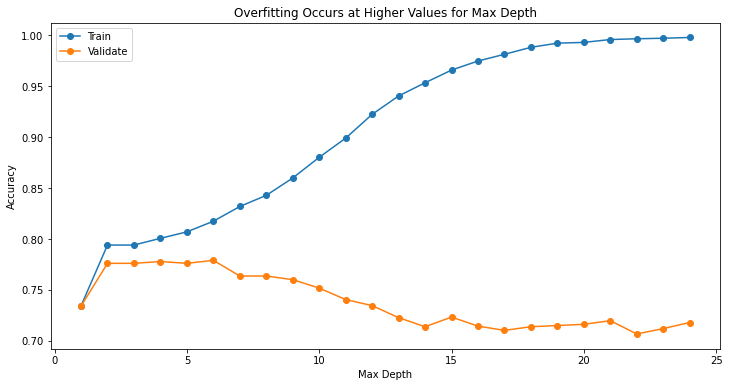

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(telco.max_depth, telco.train_accuracy, marker = 'o', label = 'Train')
plt.plot(telco.max_depth, telco.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
telco[telco.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


,max_depth,train_accuracy,validate_accuracy,difference
5,6,0.817374,0.779028,0.038345
3,4,0.800610,0.777844,0.022766
1,2,0.794006,0.776066,0.017939
2,3,0.794006,0.776066,0.017939
4,5,0.806960,0.776066,0.030893
6,7,0.831852,0.763626,0.068226
7,8,0.842774,0.763626,0.079148
8,9,0.859792,0.760071,0.099721
0,1,0.734315,0.734005,0.000311


### Continue working in your model file with titanic data to do the following:



In [56]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [57]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,                  
                            max_depth=10, 
                            random_state=123)


In [58]:
rf.fit(X_train_titanic, y_train_titanic)

RandomForestClassifier(max_depth=10, random_state=123)

In [59]:
print(rf.feature_importances_)

[0.08993337 0.21731088 0.0563468  0.0280238  0.23875337 0.01848333
 0.31234081 0.01510919 0.02369845]


In [60]:
y_pred_titanic = rf.predict(X_train_titanic)

In [61]:
y_pred_proba_titanic = rf.predict_proba(X_train_titanic)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [62]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_titanic, y_train_titanic)))

Accuracy of random forest classifier on training set: 0.97


In [63]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

[[307   0]
 [ 15 176]]


In [64]:
print(classification_report(y_train_titanic, y_pred_titanic))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [65]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_predictions_titanic).ravel()

ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

(134, 277, 30, 57, 498)

In [66]:
accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [112]:
model_prediction = y_train_titanic.copy()

# Let's get loopy
# Make the model
for i in range(1, 6):
    for j in range(10, 5, -1):
        rf = RandomForestClassifier(
            min_samples_leaf=i, 
            max_depth=j, 
            random_state=123
        )
        rf.fit(X_train_titanic, y_train_titanic)
        
        curr_preds = rf.predict(X_train_titanic)
        
        model_prediction[f'msl_{i}_md_{j}'] = curr_preds
    

In [113]:
model_prediction

583                                                                                                    0
165                                                                                                    1
50                                                                                                     0
259                                                                                                    1
306                                                                                                    1
                                                         ...                                            
msl_5_md_10    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0...
msl_5_md_9     [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0...
msl_5_md_8     [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0...
msl_5_md_7     [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 

In [69]:
model_prediction.head()

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: object

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [114]:
actuals = model_prediction.survived
preds = model_prediction.drop(columns = 'survived')

for column in preds.columns:
    
    accuracy = (actuals == preds[column]).mean()
    
    print(f'{column} accuracy: {accuracy}')

AttributeError: 'Series' object has no attribute 'survived'

In [70]:
actuals = model_prediction.survived
preds = model_prediction.drop(columns = 'survived')

for column in preds.columns:
    accuracy = (actuals == preds[column]).mean()
    print(f'{column} accuracy: {accuracy}')

AttributeError: 'Series' object has no attribute 'survived'

# KNN
### Continue working in your model file with the titanic dataset.

In [71]:
import acquire
import prepare

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data



In [72]:
# Acquire Step
df = acquire.get_titanic_data()
#df = df.drop(columns='passenger_id')

In [73]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [74]:
train, validate, test = prepare.prep_titanic_data(df)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [75]:
train.shape

(498, 12)

In [76]:
# Preprocessing for modeling
X_train_titanic = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train_titanic = train.survived

X_validate_titanic = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate_titanic = validate.survived

X_test_titanic = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test_titanic = test.survived


#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)


In [77]:
knn_titanic = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [79]:
knn_titanic.fit(X_train_titanic, y_train_titanic)

KNeighborsClassifier()

In [83]:
y_pred_titanic = knn_titanic.predict(X_train_titanic)

In [84]:
y_pred_proba_titanic = knn_titanic.predict_proba(X_train_titanic)


#### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [85]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_titanic.score(X_train_titanic, y_train_titanic)))

Accuracy of KNN classifier on training set: 0.80


In [86]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

[[258  49]
 [ 53 138]]


In [87]:
print(classification_report(y_train_titanic, y_pred_titanic))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       307
           1       0.74      0.72      0.73       191

    accuracy                           0.80       498
   macro avg       0.78      0.78      0.78       498
weighted avg       0.79      0.80      0.79       498



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [89]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_pred_titanic).ravel()
ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

(138, 258, 49, 53, 498)

In [90]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7951807228915663
True Positive Rate: 0.7225130890052356
False Positive Rate: 0.15960912052117263
True Negative Rate: 0.8403908794788274
False Negative Rate: 0.2774869109947644
Precision: 0.7379679144385026
Recall: 0.7225130890052356
F1 Score: 0.73015873015873
Support (0): 191
Support (1): 307


#### 4. Run through steps 1-3 setting k to 10



#### 1. CREATE & FIT

In [91]:
knn_titanic2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [92]:
knn_titanic2.fit(X_train_titanic, y_train_titanic)

KNeighborsClassifier(n_neighbors=10)

In [94]:
y_pred_titanic = knn_titanic2.predict(X_train_titanic)

In [95]:
y_pred_proba_titanic = knn_titanic2.predict_proba(X_train_titanic)


#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [96]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_titanic2.score(X_train_titanic, y_train_titanic)))

Accuracy of KNN classifier on training set: 0.74


In [97]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

[[275  32]
 [ 95  96]]


In [98]:
print(classification_report(y_train_titanic, y_pred_titanic))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       307
           1       0.75      0.50      0.60       191

    accuracy                           0.74       498
   macro avg       0.75      0.70      0.71       498
weighted avg       0.75      0.74      0.73       498



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [99]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_pred_titanic).ravel()
ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

(96, 275, 32, 95, 498)

In [100]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7449799196787149
True Positive Rate: 0.5026178010471204
False Positive Rate: 0.10423452768729642
True Negative Rate: 0.8957654723127035
False Negative Rate: 0.4973821989528796
Precision: 0.75
Recall: 0.5026178010471204
F1 Score: 0.6018808777429466
Support (0): 191
Support (1): 307


#### 5. Run through steps 1-3 setting k to 20



### CREATE & FIT

In [103]:
knn_titanic3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [104]:
knn_titanic3.fit(X_train_titanic, y_train_titanic)

KNeighborsClassifier(n_neighbors=20)

In [105]:
y_pred_titanic = knn_titanic3.predict(X_train_titanic)

In [106]:
y_pred_proba_titanic = knn_titanic3.predict_proba(X_train_titanic)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [107]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_titanic3.score(X_train_titanic, y_train_titanic)))

Accuracy of KNN classifier on training set: 0.72


In [108]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

[[269  38]
 [102  89]]


In [109]:
print(classification_report(y_train_titanic, y_pred_titanic))

              precision    recall  f1-score   support

           0       0.73      0.88      0.79       307
           1       0.70      0.47      0.56       191

    accuracy                           0.72       498
   macro avg       0.71      0.67      0.68       498
weighted avg       0.72      0.72      0.70       498



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [110]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_pred_titanic).ravel()
ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

(89, 269, 38, 102, 498)

In [111]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7188755020080321
True Positive Rate: 0.46596858638743455
False Positive Rate: 0.1237785016286645
True Negative Rate: 0.8762214983713354
False Negative Rate: 0.5340314136125655
Precision: 0.7007874015748031
Recall: 0.46596858638743455
F1 Score: 0.559748427672956
Support (0): 191
Support (1): 307


#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



K5 = Accuracy of KNN classifier on training set: 0.80

K10 = Accuracy of KNN classifier on training set: 0.74


K20 = Accuracy of KNN classifier on training set: 0.72

K5 performs better.

#### 7. Which model performs best on our out-of-sample data from validate?

K5 = Accuracy: 0.7951807228915663

K10 = Accuracy: 0.7449799196787149


K20 = Accuracy: 0.7188755020080321


K5's accuracy was higher that 10 and 20.